<a href="https://colab.research.google.com/github/royaditya12/Computer-Vision-Projects-Self/blob/main/vehicles-yolov8_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics roboflow wandb opencv-python-headless pillow matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.13.0.92
    Uninstalling opencv-python-headless-4.13.0.92:
      Successfully uninstalled opencv-python-headless-4.13.0.92
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [3]:
# Imports
import os
import wandb
import roboflow
from ultralytics import YOLO
from roboflow import Roboflow

import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

print(f"CUDA available: {torch.cuda.is_available()}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
CUDA available: True


In [29]:
import os
os.environ["WANDB_MODE"] = "online"

In [5]:
WORKSPACE_NAME = "aditya-roy-vqep9"
PROJECT_NAME = "vehicle-5kcdl-pc7a9"
VERSION_NUMBER = 1

rf = Roboflow(api_key="RsiXZz16qaeNO0rHdEJp")
project = rf.workspace("aditya-roy-vqep9").project("vehicle-5kcdl-pc7a9")
version = project.version(5)
dataset = version.download("yolov8")



DATA_YAML_PATH = f"{dataset.location}/data.yaml"
print(f"Dataset downloaded to: {dataset.location}")
print(f"Data YAML path: {DATA_YAML_PATH}")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to VEHICLE-5 in yolov8:: 100%|██████████| 3276/3276 [00:00<00:00, 6119.91it/s]

Dataset downloaded to: /content/VEHICLE-5
Data YAML path: /content/VEHICLE-5/data.yaml


In [4]:
wandb.login()

WANDB_PROJECT = "vehicles-object-detection-yolov8"

invalid escape sequence '\/'
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 2


wandb: You chose 'Use an existing W&B account'
wandb: Logging into https://api.wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: Create a new API key at: https://wandb.ai/authorize?ref=models
wandb: Store your API key securely and do not share it.
wandb: Paste your API key and hit enter:

 ··········


wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: adityaroy (adityaroy-iit-kharagpur) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [6]:
# # Initialize a W&B run
# wandb.init(
#     project=WANDB_PROJECT,
#     name="baseline-run",
#     config={
#         "model": "yolov8n",
#         "epochs": 50,
#         "imgsz": 640,
#         "batch": 16,
#         "lr0": 0.01,
#         "lrf": 0.01,
#     }
# )

# Load pretrained YOLOv8 model
model = YOLO("yolov8n.pt")

# Train the model
results = model.train(
    data=DATA_YAML_PATH,
    epochs=50,
    imgsz=640,
    batch=16,
    optimizer="AdamW",
    lr0=0.001,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    name="baseline_experiment",
    project="yolov8_training",
    patience=10,  # Early stopping patience
    save=True,
    plots=True,
)

#wandb.finish()

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/VEHICLE-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=baseline_experiment, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=10

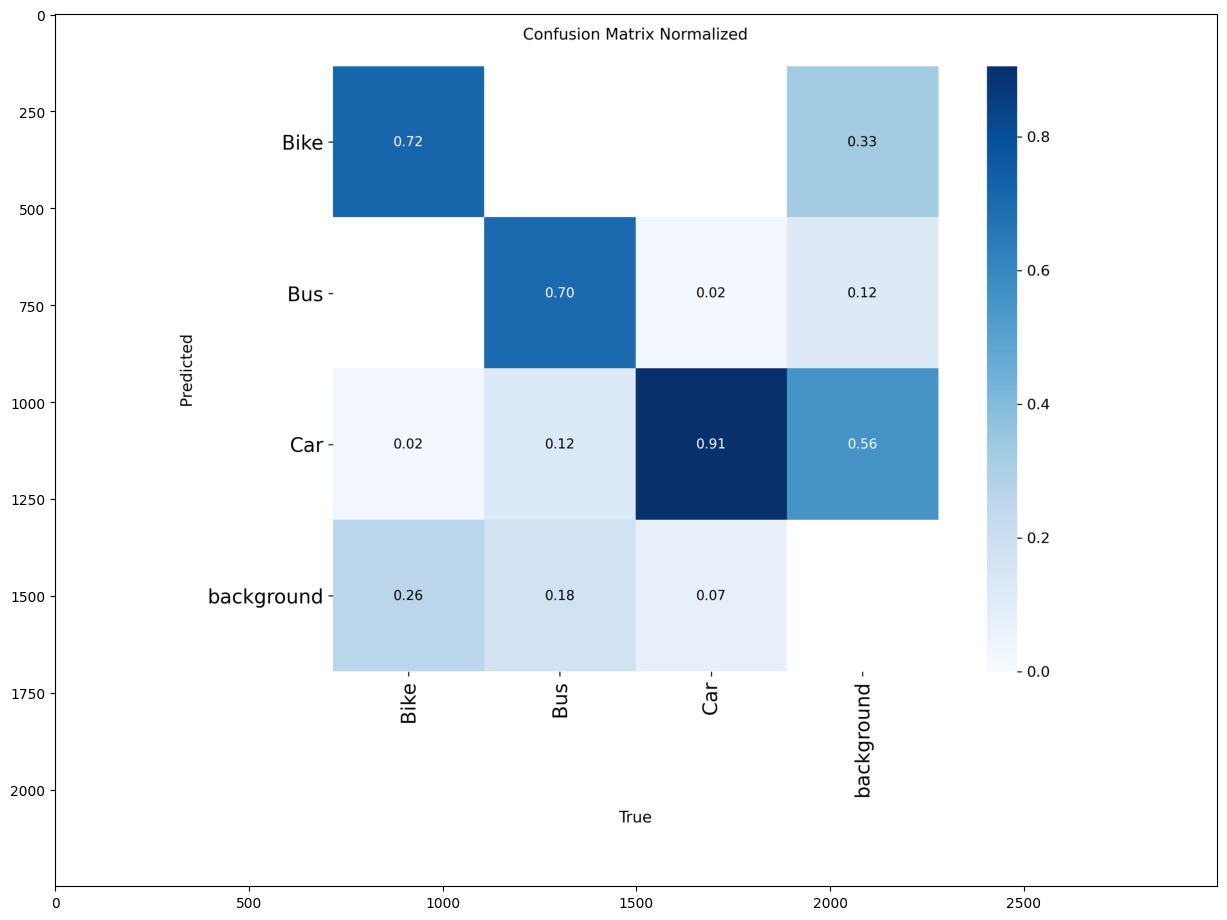

In [22]:
saved_image_path1 = "/content/runs/detect/yolov8_training/baseline_experiment/confusion_matrix_normalized.png"

image = cv2.imread(saved_image_path1)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 15))
plt.imshow(image_rgb)
plt.show()

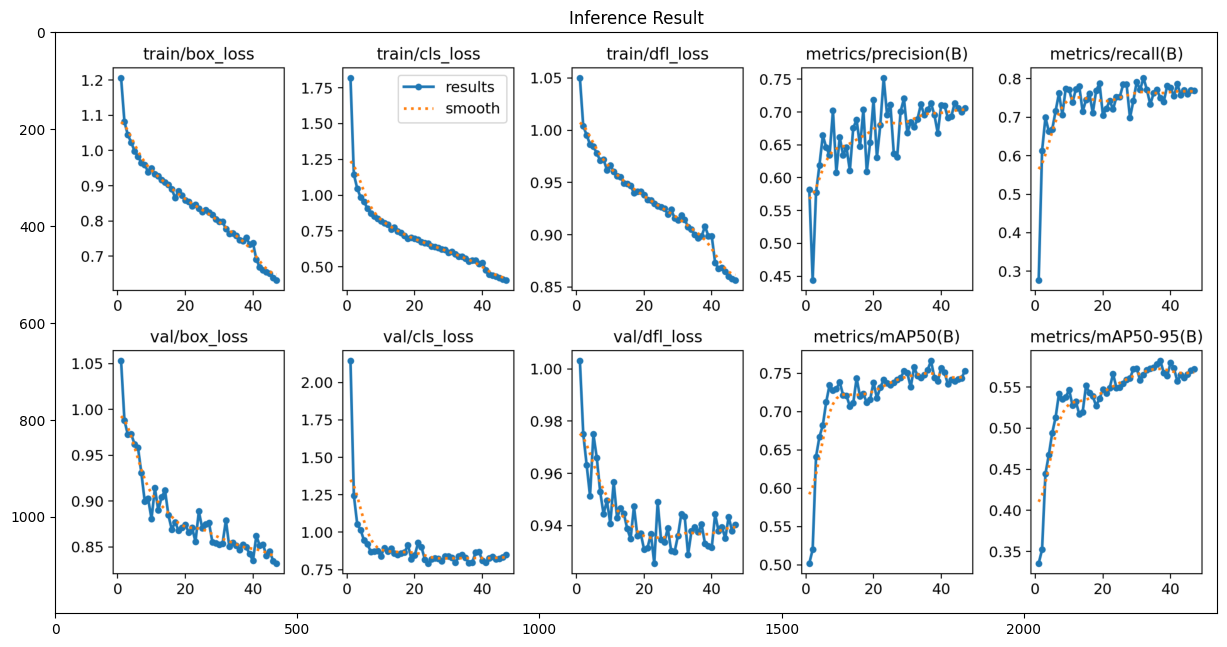

In [18]:
saved_image_path = "/content/runs/detect/yolov8_training/baseline_experiment/results.png"

image = cv2.imread(saved_image_path)
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 15))
plt.imshow(image_rgb)
plt.title(f"Inference Result")
plt.show()

In [30]:
# Define sweep configuration
sweep_config = {
    'method': 'bayes',
    'metric': {
        'name': 'metrics/mAP50-95(B)',  # Metric to optimize
        'goal': 'maximize'
    },
    'parameters': {
        'epochs': {
            'value': 100
        },
        'imgsz': {
            'value': 640
        },
        'batch': {
            'values': [8, 16, 32]
        },
        'lr0': {
            'min': 0.0001,
            'max': 0.005,
            'distribution': 'log_uniform_values'
        },
        'lrf': {
            'min': 0.01,
            'max': 0.1,
            'distribution': 'log_uniform_values'
        },
        'momentum': {
            'min': 0.85,
            'max': 0.95
        },
        'weight_decay': {
            'min': 0.0001,
            'max': 0.001,
            'distribution': 'log_uniform_values'
        }
    }
}

# Initialize sweep
sweep_id = wandb.sweep(sweep_config, project=WANDB_PROJECT)
print(f"Sweep ID: {sweep_id}")

Create sweep with ID: v4kag809
Sweep URL: https://wandb.ai/adityaroy-iit-kharagpur/vehicles-object-detection-yolov8/sweeps/v4kag809
Sweep ID: v4kag809


In [31]:
from ultralytics.models.nas import val
from wandb.integration.ultralytics import add_wandb_callback
def train_with_sweep():
   with wandb.init() as run:
      config = wandb.config
      #run.name = f"bs{config.batch}_lr{config.lr0}_lrf{config.lrf}"

      # Load model
      model = YOLO("yolov8n.pt")
      #add_wandb_callback(model, enable_model_checkpointing=True)

      # Train with sweep parameters
      results = model.train(
          data=DATA_YAML_PATH,
          epochs=config.epochs,
          imgsz=config.imgsz,
          batch=config.batch,
          optimizer="AdamW",
          lr0=config.lr0,
          lrf=config.lrf,
          momentum=config.momentum,
          weight_decay=config.weight_decay,
          name= run.name,
          project="vehicles-object-detection-yolov8",
          save=False,
          plots=True
      )

    #wandb.finish()

In [32]:
wandb.agent(sweep_id, function=train_with_sweep, count=10)

wandb: Agent Starting Run: 6btqoyue with config:
wandb: 	batch: 16
wandb: 	epochs: 100
wandb: 	imgsz: 640
wandb: 	lr0: 0.002470293965201434
wandb: 	lrf: 0.0126585945716193
wandb: 	momentum: 0.8658320395587858
wandb: 	weight_decay: 0.00025942735489938495
wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from /root/.netrc.


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/VEHICLE-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.002470293965201434, lrf=0.0126585945716193, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.8658320395587858, mosaic=1.0, multi_scale=0.0, name=fiery-sweep-1, nbs=64, nms=False, opset=None, optimize=False, optimizer=

wandb: Ctrl + C detected. Stopping sweep.


In [ ]:
# best hyperparameters obtained from W&B sweep dashboard
BEST_CONFIG = {
    "model": "yolov8n",
    "epochs": 150,
    "imgsz": 640,
    "batch": 16,
    "lr0": 0.005,
    "lrf": 0.01,
    "momentum": 0.9,
    "weight_decay": 0.0005,
}

wandb.init(
    project=WANDB_PROJECT,
    entity=WANDB_ENTITY,
    name="final-best-model",
    config=BEST_CONFIG
)

model = YOLO("yolov8n.pt")

# Train with best hyperparameters
results = model.train(
    data=DATA_YAML_PATH,
    epochs=BEST_CONFIG["epochs"],
    imgsz=BEST_CONFIG["imgsz"],
    batch=BEST_CONFIG["batch"],
    lr0=BEST_CONFIG["lr0"],
    lrf=BEST_CONFIG["lrf"],
    momentum=BEST_CONFIG["momentum"],
    weight_decay=BEST_CONFIG["weight_decay"],
    hsv_h=BEST_CONFIG["hsv_h"],
    hsv_s=BEST_CONFIG["hsv_s"],
    hsv_v=BEST_CONFIG["hsv_v"],
    degrees=BEST_CONFIG["degrees"],
    flipud=BEST_CONFIG["flipud"],
    fliplr=BEST_CONFIG["fliplr"],
    mosaic=BEST_CONFIG["mosaic"],
    name="final_model",
    project="yolov8_final",
    patience=20,
    save=True,
    plots=True,
)

BEST_MODEL_PATH = "runs/detect/final_model/weights/best.pt"

wandb.finish()
print(f"\nFinal model saved at: {BEST_MODEL_PATH}")

In [ ]:
model = YOLO(BEST_MODEL_PATH)

metrics = model.val(data=DATA_YAML_PATH, split='test')

print("\n=== Test Set Evaluation ===")
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP75: {metrics.box.map75:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")

In [ ]:
TEST_IMAGE_PATH = "/content/test_images/image0102.jpg"

# Run inference
results = model.predict(
    source=TEST_IMAGE_PATH,
    conf=0.25,  # Confidence threshold
    iou=0.45,   # IoU threshold
    save=True,
    save_txt=True,
    save_conf=True,
    project="predictions",
    name="test_results"
)

for result in results:
    result.show()
    boxes = result.boxes
    print(f"\nDetected {len(boxes)} objects:")
    for box in boxes:
        class_id = int(box.cls[0])
        confidence = float(box.conf[0])
        class_name = model.names[class_id]
        print(f"  - {class_name}: {confidence:.2f}")